<a href="https://colab.research.google.com/github/queenhesti/UAS_SLO/blob/main/UAS_PCA_%26_NN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INPUT LIBRARY

Pada tugas kali ini, membuat tugas salah satu dimensionality reduction yaitu 
Principal Component Analysis (PCA). Langkah pertama yang dilakukan adalah memasukkan beberapa library phyton yang digunakan dalam percobaan. Adapun library yang digunakan antara library untuk pengolahan data, analisa data, perhitungan scientific, visualisasi data dalam bentuk barplot & plot. Selain itu memasukan juga beberapa class yang didapat dari library sklearn.processing yang berfungsi sebagai pengubah string menjadi bentuk numerik dan dari library sklearn metric untuk melakukan proses kalkulasi. Dilanjutkan dengan memasukan satu class pada library sklearn.model_selection yang untuk membagi data. Dan dilanjutkan memasukan libary keras untuk memodelkan algoritma teknik ANN dan library sklearn.decomposition yang digunakan untuk PCA itu sendiri.

In [ ]:
import pandas as pd #Pandas adalah library phyton yang berfokus pada analisa data yang memiliki struktur data yang diperlukan untuk membersihkan data mentah  ke dalam sebuah bentuk yang cocok untuk dianalisis. Data disini berasal dari dataset yang sudah diimport sebelumnya
import seaborn as sns #Seaborn adalah library phyton yang digunakan untuk berfungsi untuk memproduksi visualisasi data, sebagai contoh untuk memrepresentasikan data kedalam grafik
import numpy as np #Numpy adalah library phyton yang fokus kepada scientific computing, biasanya digunakan untuk membuat objek N-dimensional array
import matplotlib.pyplot as plt #matplotlib adalah library yang memiliki fungsi sama dengan Seaborn, namun seaborn memiliki beberapa kelebihan dibandingkan matplotlib
%matplotlib inline 
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder #LabelEncoder adalah class yang didownload dari library sklearn.processing yang digunakan untuk mengubah string menjadi integer. Dalam code ini, mengubah kondisi menjadi numerik
from sklearn.preprocessing import StandardScaler #StandardScaler adalah class dari sklearn untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar
from sklearn.model_selection import train_test_split #train_test_split #Train test split adalah class dari sklearn yang digunakan untuk membagi data menjadi dua bagian yaitu data tes dan train
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import keras #memasukan library keras
from keras.models import Sequential #Sequential digunakan untuk mengatur layer keras dalam urutan, sequential sering digunakan dalam ANN ( )
from keras.layers import Activation, Dropout, Flatten, Dense 
from sklearn.metrics import accuracy_score #sklearn.metrics digunakan untuk mengklasifikasikan sesuatu #class digunakan untuk menghitung akurasi 
from sklearn.metrics import precision_score #class digunakan untuk menghitung presisi
import sklearn.metrics as metrics #sklearn.metrics digunakan untuk mengimplementasikan beberapa fungsi seperti loss, score, and utility untuk kinerja klasifikasi.
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from time import time
from sklearn.decomposition import PCA

# DATA  


Pada codingan ini, dilakukan proses mengimport atau memasukan file yang telah didapat dari github kedalam google collab.dan dilakukan proses pengubahan dataset menjadi DataFrame yang kemudian dilanjutkan dengan menampilkan isi dari dataset tersebut.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/syamsulrizal123/SLO/main/data_cancer.csv', sep = ',') #digunakan untuk menjadikan dataset datacancer menjadi DataFrame (data) menggunakan library panda
data.head() #digunakan untuk membaca serta memeriksa bagaimana data terdistribusi


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Setelah itu proses yang dilakukan bentuk dari dataframe yang sudah diimport. Data ditampilkan dalam bentuk baris, kolom

In [ ]:
data.shape #menampilkan jumlah data dalam bentuk baris dan kolom 


(569, 33)

Setelah melihat isi dari dataset, dilakukan proses identifikasi tipe data dari data set tersebut. Hal tersebut dilakukan dengan codingan dibawah ini

In [ ]:
data.info() #menampilkan info seperti kolom tersebut merupakan integer, float atau jenis lain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Selanjutnya menampilkan secara visual isi dari data set. Dibawah ini dilakukan ploting sesuai dengan jumlah kolom pada data set. Sumbu horizontal pada plot tersebut menginterpretasikan nilai setiap kolom sedangkan sumbu vertikal berisikan jumlah data dengan nilai tersebut.

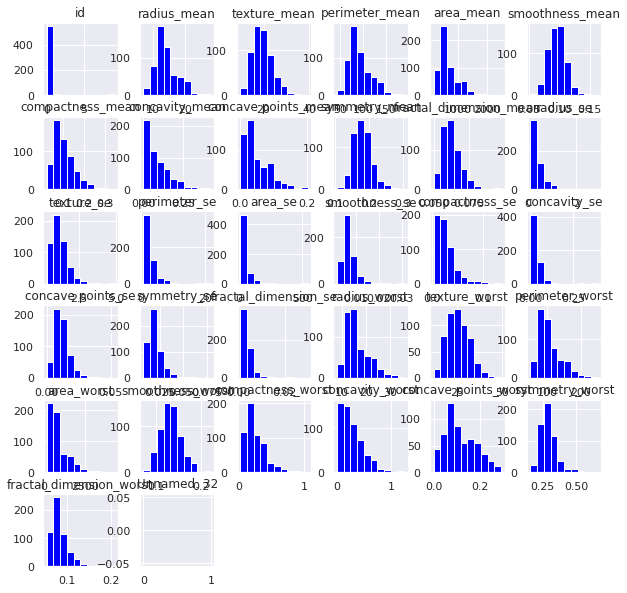

In [ ]:
sns.set() #digunakan sebagai interface
data.hist(figsize=(10,10), color='Blue') #.hist untuk mengatur bentuk dan warna grafik
plt.show() #digunakan untuk menampilkan grafik

Setelah menampilkan bentuk dari DataFrame serta memvisualisasikan DataFrame tersebut dilakukan pembuangan kolom yang tidak digunakan pada data set ini kolom yang dibuang adala Unamed: 32 dan id 

In [ ]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True) # digunakan untuk mendrop data unnamed dan id yang ada pada data frame

Dari data set dapat dilihat bahwa ada 1 kolom yang memiliki tipe data string64 yaitu diagnosis yang terdiri dari B dan M. Dengan tipe data tersebut pemrosesan tidak dapat dilakukan sehingga dilakukan proses pengubahan data tersebut kedalam bentuk angka. Setelah diganti, ditampilkan info dar data set untuk memastikan tipe data tersebut. 
Setelah melakukan proses pengubahan, langkah selanjutnya menampilkan isi data set untuk memastikan dataset sudah berubah sesuai dengan nilai integer yang sudah di declare sebelumnya. Detail tertera pada coding dibawah ini.

In [ ]:
data.diagnosis.replace(('B', 'M'), (1, 0), inplace=True) #digunakan untuk mengganti kata "B" dengan angka "1", dan mengganti "M" dengan "0"
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Sebelum melakukan pemrosesan dari data tersebut, pengecekan data perlu dilakukan karena apabila terdapat data Nan atau Null pemrosesan selanjutnya tidak dilakukan. Code dibawah berfungsi untuk menampilkan jumlah NaN dan Null pada data set Jika terdapat data NaN dan Null langka selanjutnya melakukan proses penghapusan data Nan dan Null namun jika proses penghapusan NaN dan Null dapat dilewati

In [ ]:
data.isnull().sum() #memeriksa jumlah data yang bernilai null

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Code dibawah berfungsi untuk menampilkan plot korelasi setiap kolom satu dengan lainnya sehingga dapat dilihat parameter pada data set yang memiliki pengaruh paling tinggi dengan kualitas. Kemudian code dibawah juga digunakan untuk memberikan judul dan memvisualisasikan data pada gambar grafik.

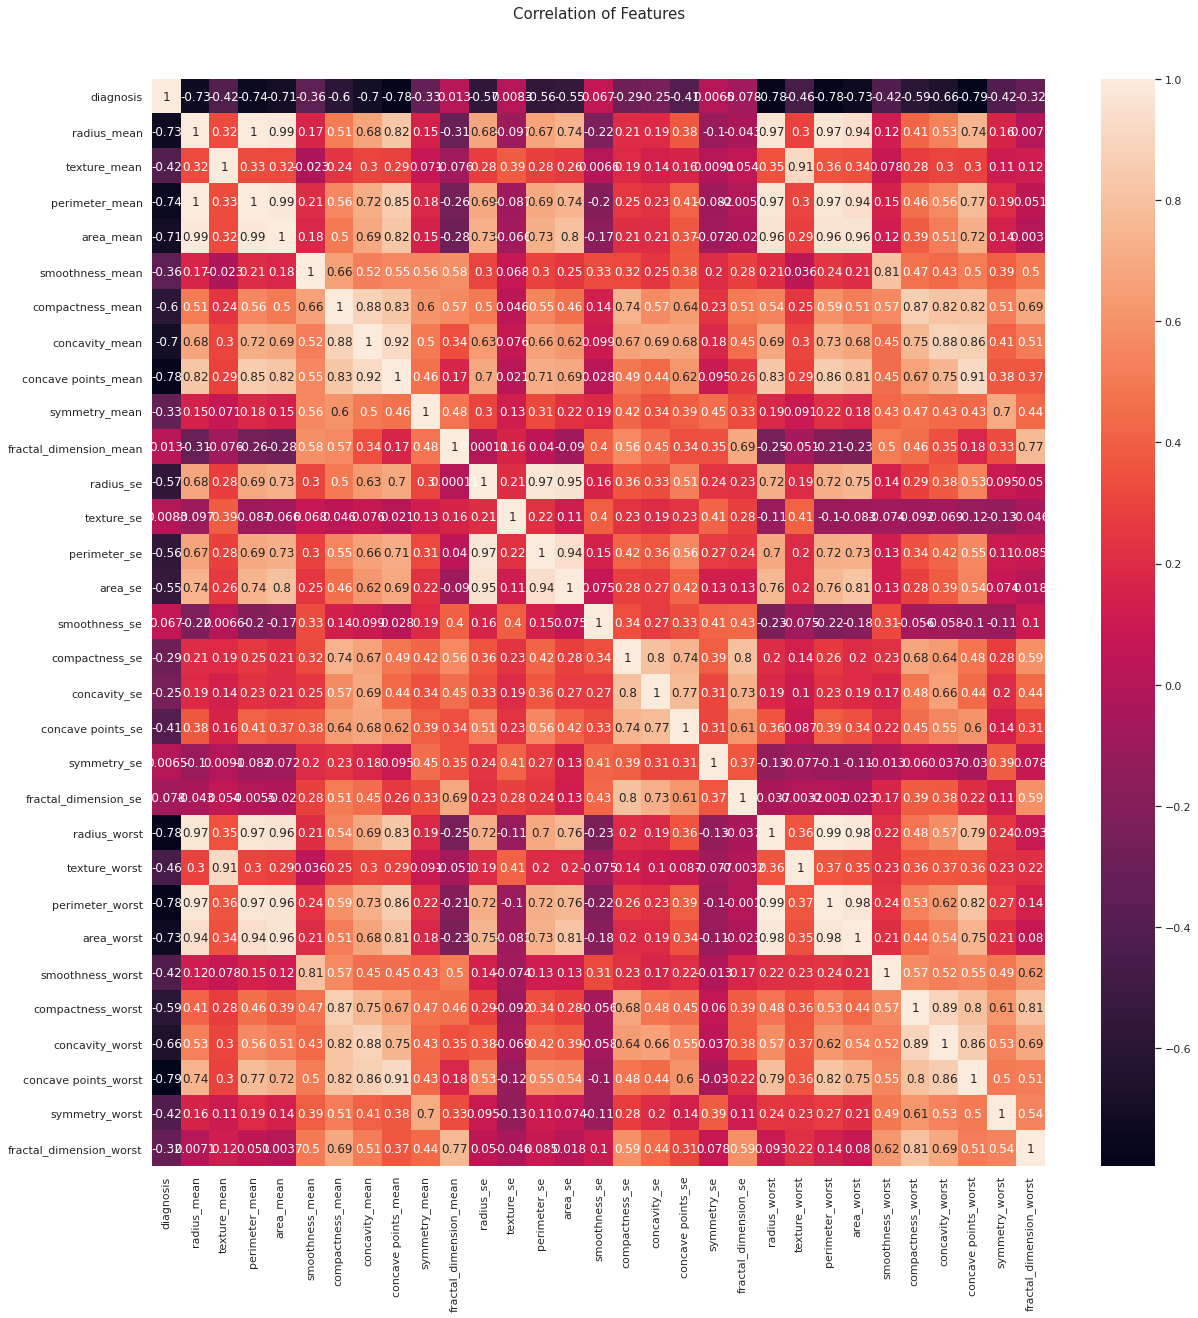

In [ ]:
fig=plt.subplots(figsize=(20,20)) #digunakan untuk plot gambar
plt.title('Correlation of Features', y= 1.05, size =15) #digunakan untuk memberi judul
corr=data.corr() #membuat data yang menampilkan kolerasi pada setiap komponen yang ada pada data set
sns.heatmap(corr, annot=True) #membuat korelasi setiap data set yang kemudian memvisualisasikannya
plt.show()

Kemudian melakukan proses perhitungan presentase dari data diagnosis dari dua parameter Malignant dan Bening dan kemudian memvisualisasikan data tersebut

In [ ]:
data_m = data[data.diagnosis == 0] 
data_b = data[data.diagnosis == 1]
labels = ["M","B"]
values = [len(data_m),len(data_b)]
trace = [go.Pie(labels=labels, values=values,
               marker=dict(colors=["blue","brown"]))]
layout = go.Layout(title="Percentage of M = malignant, B = benign ")
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

Keseluruhan coding dibawah ini berfungsi untuk mengencode categorial data yang dilakukan dari tahap pendeteksian atau pemilihan lokasi integer berdasarkan posisi atau dapat dikatakan memilih kolom indepen sebagai catatan [baris,kolom] dimana x merepresentasikan komponen yang indepen dari data frame disini x berarti komponen yang berada pada kolom 1- 32 dengan seluruh baris sedangkan y merepresentasikan komponen yang bergantung dari data frame dari data frame komponen yang bergantung adalah diagnosis yang berapa pada kolom 0 dan menggunakan semua baris  

In [ ]:
x=data.iloc[:, 1:32].values #iloc digunakan untuk pengindeksan / pemilihan berbasis lokasi integer berdasarkan posisi (Semua baris dan kolom 1 sampai 32)
y=data.iloc[:, 0].values #iloc digunakan untuk pengindeksan / pemilihan berbasis lokasi integer berdasarkan posisi (semua baris dan kolom 0)
x.shape #menampilkan jumlah data dalam bentuk baris dan kolom 

(569, 30)

# Principal Component Analysis

Standard Scaler atau dapat dikatakan melakukan pengubahan atau pengskalaan dari nilai variable menjadi lebih kecil sehingga tidak dibutuhkan plot yang lebih besar. Seperti mengubah 10,20,40 menjadi 0.5,1,2 dan sebagainya.
Kemudian dilakukan proses dimensionality menggunakan PCA dari 30 komponen yang tersedia pada data frame hanya 2 komponen yang digunakan

In [ ]:
scaler = StandardScaler() #digunakan untuk melakukan normalisasi data
x_scaled = scaler.fit_transform(x) #digunakan untuk menyesuaikan dengan data lalu mengubahnya
pca = PCA(n_components=2) #digunakan untuk mengklasifikasi dengan principal component analysis, yang dihasilkan dengan menyesuaikan fitting class ke data dengan menggunakan aturan bayes
pca.fit(x_scaled) #digunakan untuk mencocokkan dengan model PCA ( principalcomponentanalysis) apakah sudah sesuai dengan yang diberikan
X_reduced_pca = pca.transform(x_scaled) #digunakan untuk mengubah data X sesuai dengan model yang telah dicocokkan

Kemudian memastikan proses pca sudah berjalan dengan menampilkan dataframe dari PCA dapat dilihat dibawah bahwa dataframe hanya terdiri dari 2 komponen dan 1 kolom berisikan hasil diagnosa. 

In [ ]:
pca_data = pd.DataFrame(X_reduced_pca,columns=["principalcomponent1","principalcomponent2"]) #digunakan untuk membuat dataset baru yaitu pca_data dimana dataset tersebut didapat setelah proses PCA dimana dari 32 komponen menjadi 2 komponen
pca_data["diagnosis"] = y #menambahkan kolom diagnosis pada dataset baru yaitu pca_data
pca_data.head() #menampilkan dataset pca_data

,principalcomponent1,principalcomponent2,diagnosis
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


Selanjutnya setelah memastikan dataframe sudah sesuai dilanjutkan dengan memvisualisasikan hasil PCA dalam bentuk gambar agar terlihat jelas

In [ ]:
gambar = pca_data["diagnosis"]
data = [go.Scatter(x = pca_data.principalcomponent1,
                   y = pca_data.principalcomponent2,
                   mode = 'markers',
                   marker=dict(
                           size=12,
                           color=gambar,
                           symbol="pentagon",
                           line=dict(width=2) #çevre çizgileri
                           ))]  
                            
layout = go.Layout(title="PCA",
                   xaxis=dict(title="Principal Component 1"),
                   yaxis=dict(title="Principal Component 2"),
                   hovermode="closest")
fig = go.Figure(data=data,layout=layout)   
pyo.iplot(fig)   

# Neural Network



Code dibawah menjelaskan proses pembagian data set menjadi dua bagian yaitu data train dan data test. Perbandingan yang dilakukan adalah 70:30 dimana data test yang digunakan 30 sedangkan data train 70. Catatan : Data train adalah Data yang digunakan untuk melatih algoritma Data testing adalah Data yang dipakai untuk mengetahui performa algoritma yang sudah dilatih sebelumnya ketika menemukan data baru yang belum pernah dilihat sebelumnya.Setelah data dibuat menjadi lebih kecil, kemudian dilanjutkan dengan proses pelatihan dari data training. Pelatihan dari data training dapat disebut juga model.  Data test dan data training yang digunakan adalah data yang telah melalui proses PCA


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #digunakan untuk declare data train dan test
X_train = pca.fit_transform(X_train) #digunakan untuk normalisasi X train 
X_test = pca.transform(X_test)#digunakan untuk normalisasi X test

Codingan dibawah digunakan untuk menampilkan data yang digunakan sebagai x_test dan x_train. 

In [ ]:
X_train #digunakan untuk mengetahui isi dari data train 

array([[-4.99817221e+02, -4.35296838e-01],
       [-6.15846784e+02, -1.35826644e+01],
       [-3.88348277e+02, -2.88068470e+00],
       [ 6.36911552e+02,  5.77487492e+01],
       [-8.78099239e+02, -7.92256853e+01],
       [-6.43897858e+02, -4.26949139e+01],
       [-3.00474365e+02,  1.41963593e+01],
       [-5.34859678e+02, -6.23559321e+00],
       [ 1.42130232e+02, -2.69795844e+01],
       [ 8.88799844e+02, -3.38394516e+01],
       [-4.22745839e+02, -3.37552649e+01],
       [-2.20534781e+02,  1.39026965e+01],
       [-3.01325271e+01, -7.42334691e+01],
       [-3.50461112e+02,  3.74994333e+01],
       [-6.26164522e+02, -6.75219113e+00],
       [-8.30533266e+00,  1.26450731e+01],
       [-3.90348629e+02,  1.73901043e+01],
       [ 1.32771167e+03, -2.24840518e+02],
       [-5.48042479e+02, -2.92924455e+01],
       [-6.31885948e+02, -2.83406204e+01],
       [ 8.05983458e+02, -4.36087791e+01],
       [-2.06486986e+02, -4.20074503e+01],
       [-5.53366841e+02, -2.21712268e+01],
       [-6.

In [ ]:
X_test #digunakan untuk mengetahui isi dari data test

array([[-9.68480188e+01, -6.44890872e+01],
       [-2.89297140e+02,  2.79880789e+01],
       [-2.05763978e+02,  5.81922888e+01],
       [-7.97746429e+01,  1.32554112e+01],
       [-3.71478340e+02,  6.09701525e+01],
       [-4.97403959e+02, -1.77798924e+01],
       [-4.59845697e+02,  2.53710581e+01],
       [-4.79689851e+02,  3.14689575e+00],
       [-8.05262637e+02, -8.12629336e+01],
       [-6.37501331e+02, -1.45784106e+01],
       [-7.46475980e+01,  3.98237853e+01],
       [-7.74878234e+01,  4.73540725e+01],
       [-7.13648458e+02, -3.15761054e+01],
       [ 2.31235936e+02,  1.16080809e+02],
       [-8.22846364e+01,  3.87677828e+01],
       [ 2.17329495e+02, -4.25834873e+01],
       [-7.28356307e+02, -4.95912383e+01],
       [ 1.17836499e+03,  5.80435470e+01],
       [ 6.25222533e+02,  2.23301171e+02],
       [ 1.32350674e+03,  2.78305989e+01],
       [-1.18266468e+02, -1.86808204e+02],
       [ 1.91084905e+02,  5.19606474e+01],
       [-2.61714587e+02,  2.13537847e+01],
       [-4.

Pada code dibawah dapat dilihat model yang digunakan adalah pemodelan sequential. Dalam codingan dibawah ini jumlah hidden layer ada 2 ,dimana untuk menambahkan hidden layer menggunakan Dense, (10, input_dim=2, activation='softmax')) sedangkan untuk didalamnya dapat dijelaskan bahwa 10 adalah neuron pada hidden layer 1, kemudian 2 adalah neuron pada bagian input sedangkan softmax adalah salah satu fungsi aktivasi. Jumlah layer dan jumlah neuron dapat disesuaikan. Kemudian melakukan konfigurasi pelatihan seperti tertera dibawah. Kemudian traning data dilakukan.

Epoch adalah kondisi ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran, karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches)

Vall_loss adalah nilai fungsi biaya untuk data validasi silang Anda dan kerugian adalah nilai fungsi biaya untuk data pelatihan Anda. Pada data validasi, neuron yang menggunakan drop out tidak menjatuhkan neuron acak. Alasannya adalah selama pelatihan kami menggunakan drop out untuk menambah kebisingan untuk menghindari pemasangan yang berlebihan.

sparse_categorical_crossentropy digunakan dalam tugas klasifikasi

In [ ]:
model = Sequential() #model adalah proses pelatihan sehingga pada code ini model yang digunakan adalah mode sequential
model.add(Dense(10, input_dim=2,activation='softmax')) # menambahkan hidden layer dan juga mendeklarasikan jumlah neuron pada input dan melakukan fungsi aktivasi yang kita gunakan softmax 
model.add(Dense(20, activation='softmax')) #menambahkan hidden layer dan neuron dan mengaktifkan 
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) #menentukan konfigurasi pelatihan (sparse_categorial_crossentropy, optimizer, metrik)
history=model.fit(X_train, y_train,epochs=100, validation_data=(X_test,y_test)) # untuk melatih model dengan membagi data menjadi"batches" of size "batch_size", dan berulang kali melakukan iterasi pada seluruh dataset untuk sejumlah "epochs". validasi untuk mamantau validation loss and metrics di akhir setiap periode

Epoch 1/100
13/13 [==============================] - 0s 11ms/step - loss: 3.0899 - accuracy: 0.0377 - val_loss: 3.0243 - val_accuracy: 0.0117
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 2.9167 - accuracy: 0.1131 - val_loss: 2.7912 - val_accuracy: 0.3275
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 2.7308 - accuracy: 0.3568 - val_loss: 2.6774 - val_accuracy: 0.3275
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 2.6198 - accuracy: 0.3568 - val_loss: 2.5638 - val_accuracy: 0.3392
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 2.5107 - accuracy: 0.4698 - val_loss: 2.4524 - val_accuracy: 0.9357
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 2.4051 - accuracy: 0.9121 - val_loss: 2.3486 - val_accuracy: 0.9357
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 2.3044 - accuracy: 0.9070 - val_loss: 2.2468 - val_accuracy: 0.9357
Epoch 8/100


Pada code dibawah ini dilakukan perhitungan nilai akurasi dari data yang sudah ditraining dan ditest sebelumnya

In [ ]:
y_pred_ann = model.predict(X_test) #y_pred_ann berisi prediksi yang ada di X_test
ac=model.evaluate(X_test,y_test)[1] #digunakan untuk menghitung akurasi
print("PCA - Neural Network Accuracy = {0:.2f}%".format(ac*100)) #digunakan untuk mengeluarkan hasil presisi dengan hasil 2 dibelakang koma

6/6 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.9415
PCA - Neural Network Accuracy = 94.15%


Setelah menghitung akurasi, Selanjutnya menampilkan "model akurasi" yang dimana berhubungan dengan nilai accuracy yang disesuaikan dengan jumlah epoch dan juga menampilkan "model loss" yang dimana berhubungan dengan nilai loss yang disesuaikan dengan jumlah epoch nilai akurasi dan nilai loss yang digunakan dari data train dan data testing. Hal tersebut dilakukan untuk melihat seberapa dekat hasil data testing dengan data train Kedua model tersebut ditampilkan dalam bentuk plot grafik

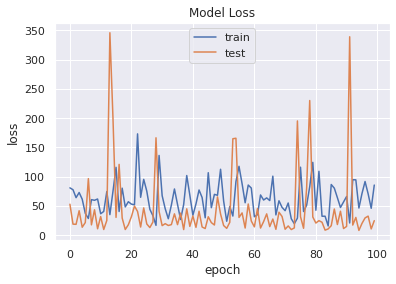

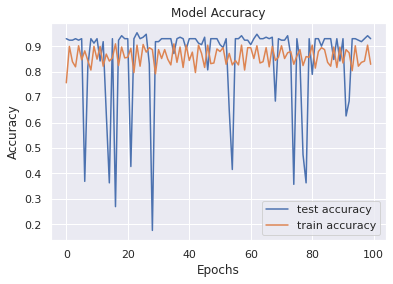

In [ ]:
#digunakan untuk membuat grafik model loss
plt.plot(history.history['loss'], label='train loss') 
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
plt.savefig('Model_Loss.png')


#digunakan untuk membuat grafik model akurasi
plt.title('Model Accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()